# Mexico toys sales

link to dataset: https://www.kaggle.com/mysarahmadbhat/toy-sales?select=products.csv

### Outline of the analysis:

1. Data cleaning
2. Which product categories drive the biggest profits? Is this the same across store locations?
3. Can you find any seasonal trends or patterns in the sales data?
4. Are sales being lost with out-of-stock products at certain locations?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

products=pd.read_csv('products.csv')
sales=pd.read_csv('sales.csv')
stores=pd.read_csv('stores.csv')
inventory=pd.read_csv('inventory.csv')

## 1. Data cleaning 

In [2]:
sales1=pd.merge(sales, products, on='Product_ID')
df=pd.merge(sales1, stores, on='Store_ID')
df.head(3)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
2,98,2017-01-01,24,4,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31


In [3]:
# clean cost and price data
df['Product_Cost'] = df['Product_Cost'].str.replace('$','')
df['Product_Price'] = df['Product_Price'].str.replace('$','')
# change type
df['Product_Cost'] = df['Product_Cost'].astype(float)
df['Product_Price'] = df['Product_Price'].astype(float)
# change type of Date column
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')

<ipython-input-3-24e2cf4169b1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Product_Cost'] = df['Product_Cost'].str.replace('$','')
<ipython-input-3-24e2cf4169b1>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Product_Price'] = df['Product_Price'].str.replace('$','')


In [4]:
# find missing values
df.isnull().sum()

Sale_ID             0
Date                0
Store_ID            0
Product_ID          0
Units               0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
dtype: int64

Dataset is very clean. Lets head to analyzing.

## 2. Which product categories drive the biggest profits? Is this the same across store locations?

### Top locations

In [5]:
# create 'Cost' and 'Sales' columns
df['Costs'] = df['Units'] * df['Product_Cost']
df['Sales'] = df['Units'] * df['Product_Price']
df['Profit'] = df['Sales'] - df['Costs']
df.head(3)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Costs,Sales,Profit
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,9.99,12.99,3.0
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,9.99,12.99,3.0
2,98,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,9.99,12.99,3.0


In [6]:
df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)

Product_Category
Toys                 1079527.0
Electronics          1001437.0
Art & Crafts          753354.0
Games                 673993.0
Sports & Outdoors     505718.0
Name: Profit, dtype: float64

The top 3 categories that drive the largest profits are Toys, Electronics, Art & Crafts.

In [7]:
df.groupby('Store_Location')['Profit'].sum().sort_values(ascending=False)

Store_Location
Downtown       2248728.0
Commercial      926864.0
Residential     460388.0
Airport         378049.0
Name: Profit, dtype: float64

For location, downtown store locations bring back the most profits, then it is commercial. 

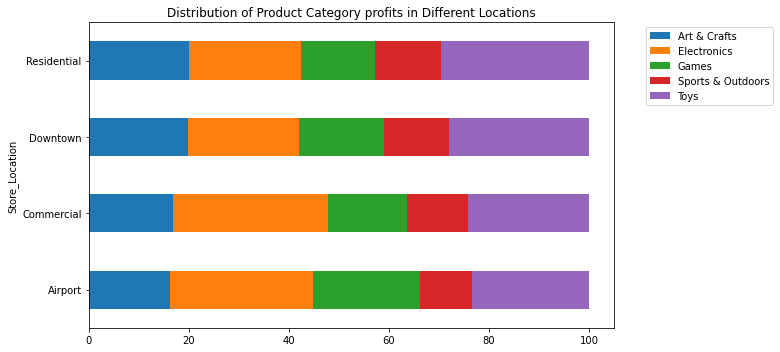

In [8]:
table=df.pivot_table('Profit',columns='Product_Category', index='Store_Location', aggfunc='sum')
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind='barh', stacked=True, figsize=(11,5))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Distribution of Product Category profits in Different Locations')
plt.tight_layout()

##### Summary: Toys and Electronics are best-selling in the product category and it is the same across all store locations. For commercial locations and airports, electronics profits come first while in residential and downtown locations it is toys. Sport & Outdoors products sales are the least in sales and across all store locations.

#### Products with best profit

Text(0, 0.5, 'Product Name')

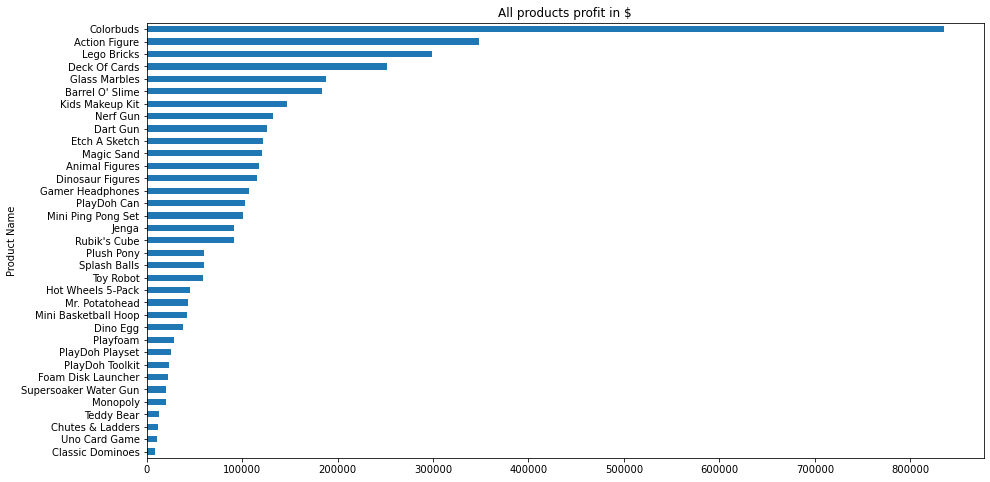

In [11]:
df.groupby(['Product_Name'])['Profit'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(15,8))
plt.title('All products profit in $')
plt.ylabel('Product Name')

####  Which cities bring back the most profit?

In [12]:
df.groupby(['Store_City'])['Profit'].sum().sort_values(ascending=False).head(10)

Store_City
Cuidad de Mexico    465558.0
Guadalajara         368930.0
Monterrey           346729.0
Hermosillo          263608.0
Guanajuato          235047.0
Puebla              229694.0
Mexicali            175048.0
Xalapa              163720.0
Saltillo            163248.0
Toluca              162702.0
Name: Profit, dtype: float64

The top cities that gain the most profits from sales are Cuidad de Mexico, Guadalajara, and Monterrey.

Text(0.5, 1.0, 'Top products in Cuidad de Mexico')

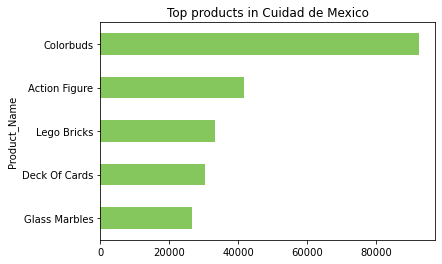

In [13]:
sales_c1=df[df['Store_City']=='Cuidad de Mexico']
sales_c1.groupby(['Product_Name'])['Profit'].sum().sort_values().tail(5).plot(kind='barh',color='#86c75d')
plt.title('Top products in Cuidad de Mexico')

Text(0.5, 1.0, 'Top products in Guadalajara')

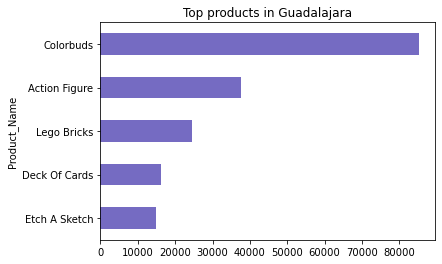

In [14]:
sales_c2=df[df['Store_City']=='Guadalajara']
sales_c2.groupby(['Product_Name'])['Profit'].sum().sort_values().tail(5).plot(kind='barh', color='#756bc2')
plt.title('Top products in Guadalajara')

The products that bring the most profits are the same in cities that are in the top best-selling. 

### 3.Can you find any seasonal trends or patterns in the sales data?

In [16]:
#create new columns: month and day
df['Month Year']=pd.to_datetime(df['Date']).dt.to_period('M')

In [17]:
sales_monthly=df.groupby(['Month Year'])['Sales'].sum()

In [19]:
df_monthly=pd.DataFrame(sales_monthly)

In [20]:
df_monthly.reset_index(inplace=True)

In [22]:
# change type
df_monthly['Month Year']=df_monthly['Month Year'].astype(str)
df_daily['Date']=df_daily['Date'].astype(str)

### What are the peak seasons?

In [23]:
# add year column into df_monthly
df_monthly['Year']=df_monthly['Month Year'].astype(str).str[0:4]
df_monthly.head(3)

,Month Year,Sales,Year
0,2017-01,542554.91,2017
1,2017-02,541351.65,2017
2,2017-03,589485.19,2017


Text(0, 0.5, 'Sales in $')

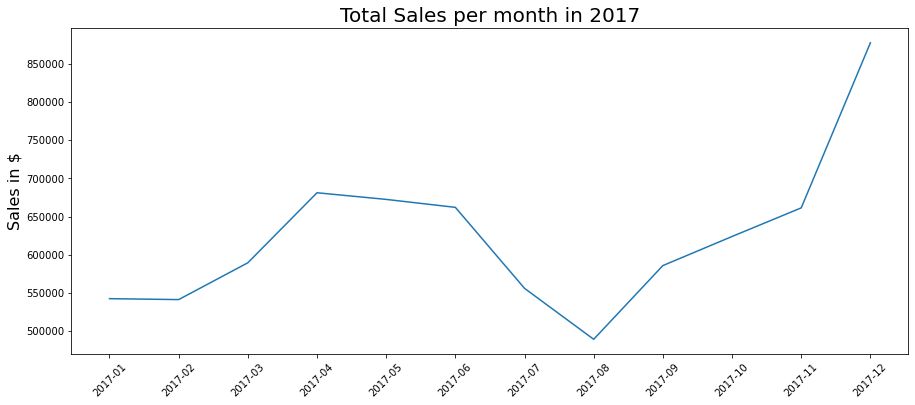

In [24]:
# plot sales per month in 2017
plt.figure(figsize=(15,6))
y17=df_monthly[df_monthly['Year']=='2017']
plt.plot('Month Year','Sales', data=y17)
plt.xticks(rotation=45, fontsize=10)
plt.title('Total Sales per month in 2017', fontsize=20)
plt.ylabel('Sales in $', fontsize=16)

Text(0, 0.5, 'Sales in $')

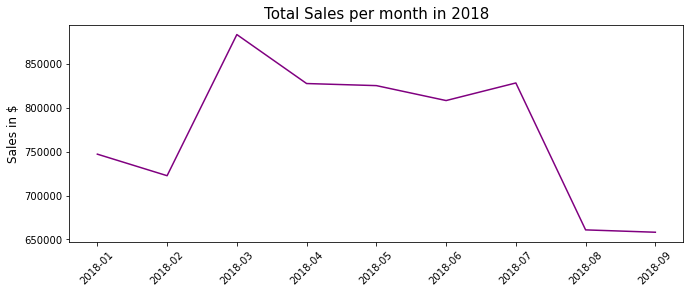

In [25]:
# plot sales per month in 2018
plt.figure(figsize=(11,4))
y18 = df_monthly[df_monthly['Year'] == '2018']
plt.plot('Month Year','Sales', data = y18, color = 'purple')
plt.xticks(rotation=45, fontsize = 10)
plt.title('Total Sales per month in 2018', fontsize = 15)
plt.ylabel('Sales in $', fontsize = 12)

Since the year 2018 data is cut at September, we only look at data from January to September.\
For the 9-month period, sales hit peak from March to June-July. Sales go up in summer time and quickly go down in fall which is when school starts and children reduce time playing with toys.\
Toy sales peak at the start of summer in 2017 and 2018, which are in April and March respectively. The following months witness a slight fall in sales 
after the peak.\
So the peak seasons in 2017 are from March to July and December; the off seasons are January-Febuary and August-September.


### Are sales being lost with out-of-stock products at certain locations? 

In [26]:
df2=pd.merge(inventory, stores, on = 'Store_ID')
df2=pd.merge(df2, products, on = 'Product_ID')

df2=df2[df2['Stock_On_Hand'] == 0]
df2.head(3)

,Store_ID,Product_ID,Stock_On_Hand,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price
1,2,1,0,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,Action Figure,Toys,$9.99,$15.99
5,6,1,0,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Action Figure,Toys,$9.99,$15.99
12,13,1,0,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Action Figure,Toys,$9.99,$15.99


In [27]:
# clean cost and price data
df2['Product_Cost'] = df2['Product_Cost'].str.replace('$','')
df2['Product_Price'] = df2['Product_Price'].str.replace('$','')
# change type
df2['Product_Cost'] = df2['Product_Cost'].astype(float)
df2['Product_Price'] = df2['Product_Price'].astype(float)

<ipython-input-27-eaf175ac90bd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Product_Cost'] = df2['Product_Cost'].str.replace('$','')
<ipython-input-27-eaf175ac90bd>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Product_Price'] = df2['Product_Price'].str.replace('$','')


In [28]:
unitsales=df[df['Month Year'] == '2018-09'].groupby(['Store_Name','Product_Name'])['Units'].sum()
unitsales=pd.DataFrame(unitsales)
unitsales.reset_index()

,Store_Name,Product_Name,Units
0,Maven Toys Aguascalientes 1,Action Figure,11
1,Maven Toys Aguascalientes 1,Animal Figures,41
2,Maven Toys Aguascalientes 1,Barrel O' Slime,66
3,Maven Toys Aguascalientes 1,Classic Dominoes,5
4,Maven Toys Aguascalientes 1,Colorbuds,44
...,...,...,...
1227,Maven Toys Zacatecas 1,Playfoam,50
1228,Maven Toys Zacatecas 1,Rubik's Cube,29
1229,Maven Toys Zacatecas 1,Splash Balls,55
1230,Maven Toys Zacatecas 1,Supersoaker Water Gun,11


In [29]:
profitloss = pd.merge(unitsales, df2, on = ['Store_Name', 'Product_Name'])
profitloss.head(3)

,Store_Name,Product_Name,Units,Store_ID,Product_ID,Stock_On_Hand,Store_City,Store_Location,Store_Open_Date,Product_Category,Product_Cost,Product_Price
0,Maven Toys Aguascalientes 1,Foam Disk Launcher,10,24,12,0,Aguascalientes,Downtown,2010-07-31,Sports & Outdoors,8.99,11.99
1,Maven Toys Aguascalientes 1,Hot Wheels 5-Pack,18,24,15,0,Aguascalientes,Downtown,2010-07-31,Toys,3.99,5.99
2,Maven Toys Aguascalientes 1,Mini Ping Pong Set,141,24,21,0,Aguascalientes,Downtown,2010-07-31,Sports & Outdoors,6.99,9.99


In [30]:
#change type
profitloss['Loss'] = profitloss['Units'] * (profitloss['Product_Price'] - profitloss['Product_Cost'])
profitloss.head(3)

,Store_Name,Product_Name,Units,Store_ID,Product_ID,Stock_On_Hand,Store_City,Store_Location,Store_Open_Date,Product_Category,Product_Cost,Product_Price,Loss
0,Maven Toys Aguascalientes 1,Foam Disk Launcher,10,24,12,0,Aguascalientes,Downtown,2010-07-31,Sports & Outdoors,8.99,11.99,30.0
1,Maven Toys Aguascalientes 1,Hot Wheels 5-Pack,18,24,15,0,Aguascalientes,Downtown,2010-07-31,Toys,3.99,5.99,36.0
2,Maven Toys Aguascalientes 1,Mini Ping Pong Set,141,24,21,0,Aguascalientes,Downtown,2010-07-31,Sports & Outdoors,6.99,9.99,423.0


#### How much do each store lose in profit in Sept2018?

In [31]:
loss_loc = profitloss.groupby(['Store_Name','Store_City','Store_Location'])['Loss'].sum()
loss_loc = pd.DataFrame(loss_loc)
loss_loc.reset_index(inplace=True)
loss_loc.head(5)

,Store_Name,Store_City,Store_Location,Loss
0,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,888.0
1,Maven Toys Chihuahua 2,Chihuahua,Downtown,21.0
2,Maven Toys Chilpancingo 1,Chilpancingo,Downtown,124.0
3,Maven Toys Ciudad Victoria 1,Ciudad Victoria,Downtown,27.0
4,Maven Toys Ciudad de Mexico 3,Cuidad de Mexico,Residential,155.0


#### How much do each city lose in profit on average?


Store_City
Hermosillo          930.000000
Aguascalientes      888.000000
La Paz              834.000000
Culiacan            821.000000
Xalapa              815.000000
Toluca              777.000000
Guanajuato          689.666667
San Luis Potosi     574.000000
Monterrey           524.666667
Pachuca             495.000000
Mexicali            471.000000
Merida              427.000000
Guadalajara         269.000000
Zacatecas           210.000000
Puebla              193.666667
Cuernavaca          171.000000
Cuidad de Mexico    158.500000
Chilpancingo        124.000000
Oaxaca              120.000000
Tuxtla Gutierrez     72.000000
Saltillo             59.500000
Morelia              57.000000
Villahermosa         34.000000
Ciudad Victoria      27.000000
Chihuahua            21.000000
Name: Loss, dtype: float64

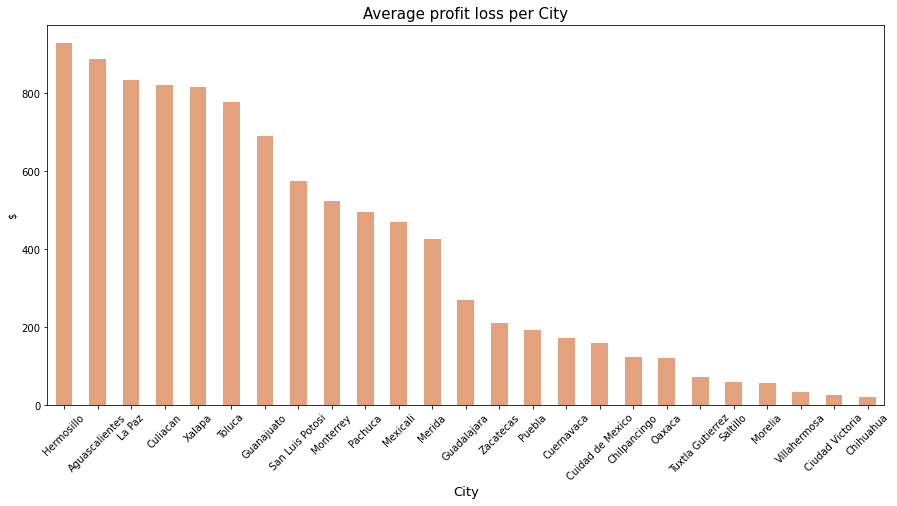

In [32]:
fig=plt.figure(figsize=(15,7))
loss_loc.groupby(['Store_City'])['Loss'].mean().sort_values(ascending=False).plot(kind='bar', color='#e3a27d')
plt.xticks(rotation=45)
plt.title('Average profit loss per City', fontsize=15)
plt.ylabel('$')
plt.xlabel('City', fontsize=13)
loss_loc.groupby(['Store_City'])['Loss'].mean().sort_values(ascending=False)

#### How much do each store location lose in profit on average?


Store_Location
Airport        486.000000
Commercial     399.875000
Downtown       451.681818
Residential    295.833333
Name: Loss, dtype: float64

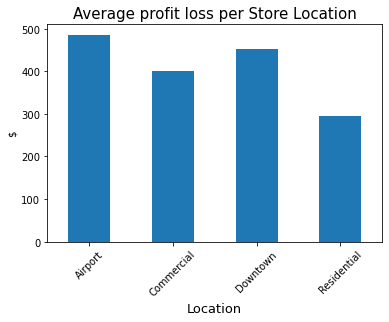

In [33]:
loss_loc.groupby('Store_Location')['Loss'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Average profit loss per Store Location', fontsize=15)
plt.ylabel('$')
plt.xlabel('Location', fontsize=13)
loss_loc.groupby('Store_Location')['Loss'].mean()

#### Which locations often run out of stocks?

Downtown       46
Commercial     15
Residential    14
Airport         2
Name: Store_Location, dtype: int64

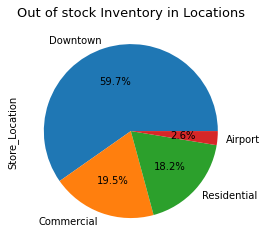

In [34]:
profitloss['Store_Location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Out of stock Inventory in Locations', fontsize=13)
profitloss['Store_Location'].value_counts()

Text(0.5, 1.0, 'Cities with most out of stock inventories')

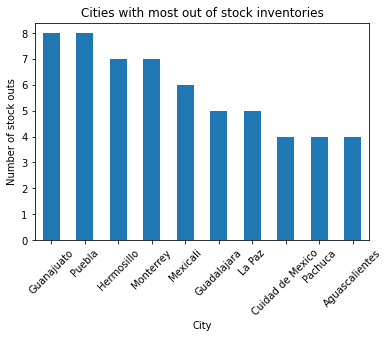

In [35]:
profitloss['Store_City'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Number of stock outs')
plt.xlabel('City')
plt.title('Cities with most out of stock inventories')

1. Stockouts in downtown stores often occured the most, which resulted in losing the second highest profit on average. 
2. Airport locations are where stockouts happened the least, however the profit loss on average was the highest(nearly 500 dollars per airport store). The sales velocity at airports is high when inventories are well-stocked, hence if stockouts occur, profit loss increases drastically. This is the same case with cities with the highest profit loss. They appear in the top 10 of cities with high loss but not in the top of most out of stock inventories.
3. The range of profit loss across cities are big. Stores in Hermosillo lost 930 dollars on average while Chihuahua lost on average 21$. 